In [1]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2024-02-21 18:43:34.584019: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 18:43:36.458072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 18:43:36.458170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 18:43:36.809804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-21 18:43:37.346075: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 18:43:37.347520: I tensorflow/core/platform/cpu_feature_guard.cc:1

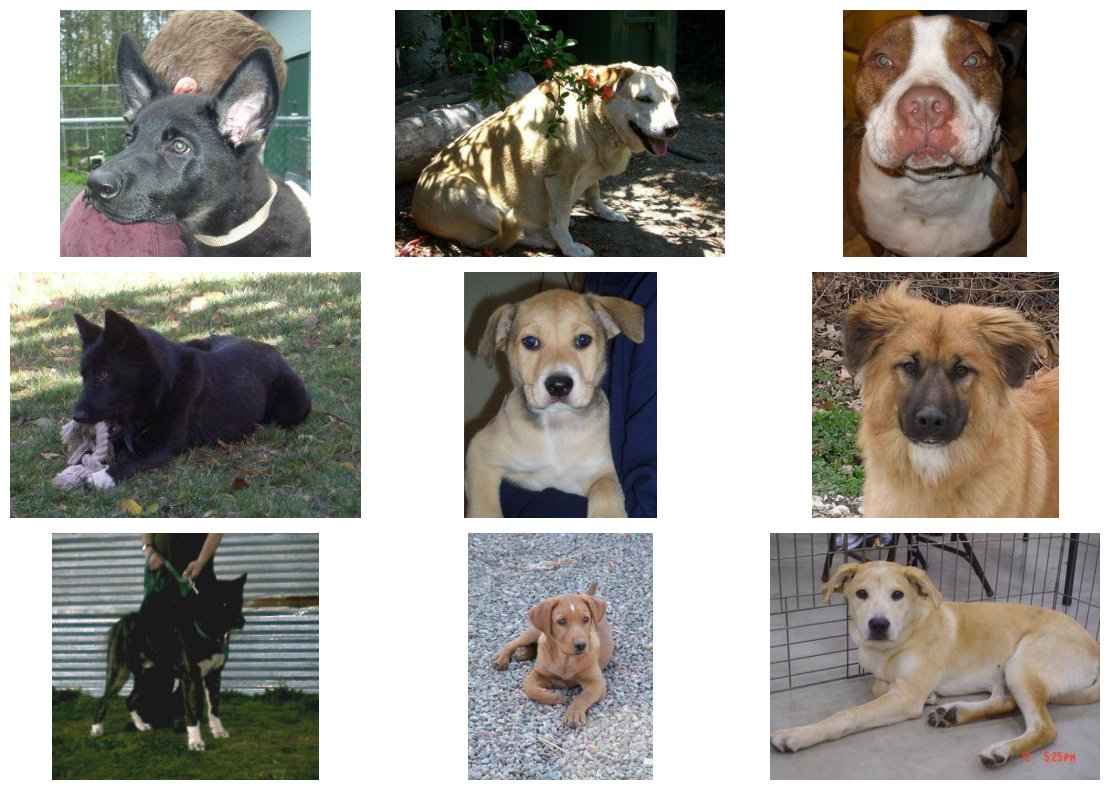

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

data_dir = "/workspaces/machine-learning-python-template-ds-Julio/data/raw"

dog_subfolder = os.path.join(data_dir, "dog")

dog_image_files = os.listdir(dog_subfolder)

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()




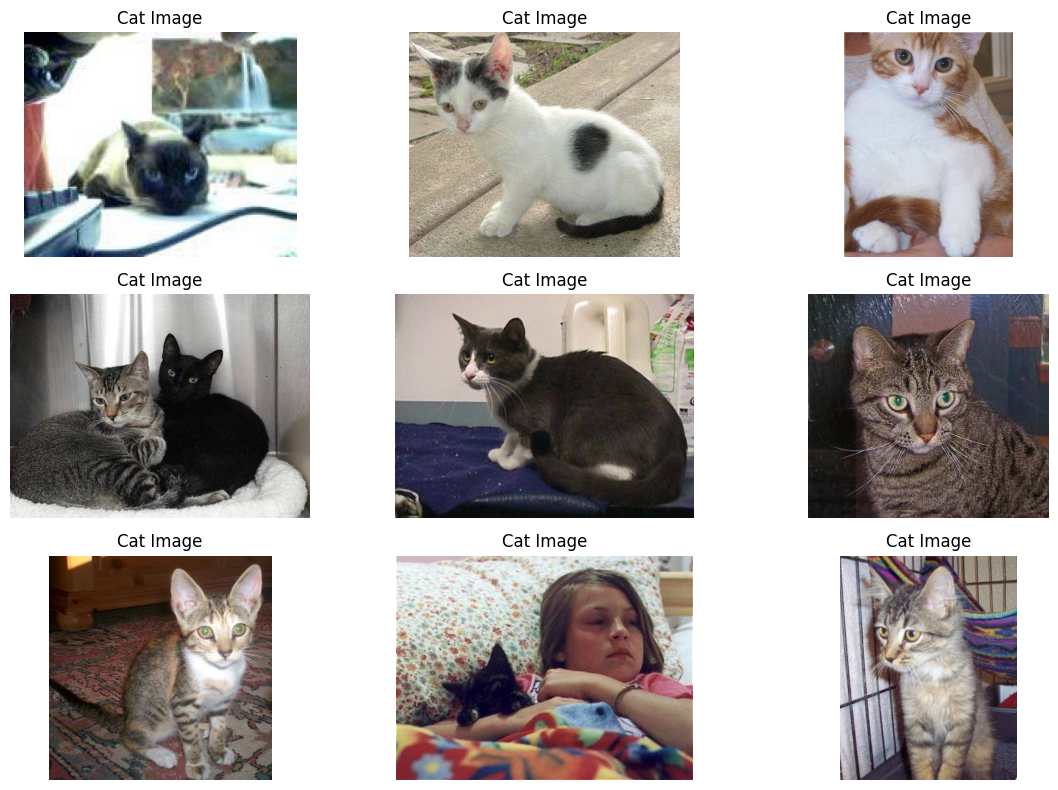

In [3]:
data_dir="/workspaces/machine-learning-python-template-ds-Julio/data/raw"

cats_subfolder= os.path.join(data_dir,"cat")

cat_image_files=os.listdir(cats_subfolder)


cats_images=[]
for i in range (min(9,len(cat_image_files))):
    img_path = os.path.join(cats_subfolder, cat_image_files[i])
    img = image.load_img(img_path)
    img_array= image.img_to_array(img)
    img_array/= 255.0
    cats_images.append(img_array)

plt.figure(figsize=(12,8))

for i in range (len(cats_images)):
    plt.subplot(3,3,i+1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')


plt.tight_layout()

plt.show()


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir="/workspaces/machine-learning-python-template-ds-Julio/data/raw"

image_size=(200,200)

datagentrain= ImageDataGenerator()
datagentest= ImageDataGenerator()

train_data=datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog","cat"]
)

test_data=datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["test_dog","test_cat"])#changed from just ["test"]


Found 24 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model=Sequential()
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2,activation="relu"))








2024-02-21 18:43:48.193502: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-02-21 18:43:48.831737: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-02-21 18:43:49.022053: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-02-21 18:43:49.317228: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-02-21 18:43:49.397895: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


In [6]:
from keras.optimizers import Adam

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])






In [7]:
# from keras.models import Sequential
# from keras.layers import Dense

# # Define your model
# model = Sequential()
# model.add(Dense(units=64, activation='relu', input_shape=(200, 200, 3)))  # Adjust input_shape based on your images
# model.add(Dense(units=1, activation='sigmoid'))  # Assuming a binary classification task

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
#train modell

model.fit(train_data, epochs = 1)




InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/vscode/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/vscode/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/local/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_428/1906049935.py", line 3, in <module>

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [24,18432], In[1]: [25088,4096]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_train_function_3952]

In [ ]:
# saving model 


from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")

early=EarlyStopping(monitor="val_accuracy", patience=3,verbose=1,mode="auto")

hist = model.fit(train_data, steps_per_epoch=100, validation_data=test_data,validation_steps=10,epochs=3,callbacks=[checkpoint,early])




Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/vscode/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/vscode/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/local/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/local/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/vscode/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/vscode/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_538/4268935304.py", line 3, in <module>

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/vscode/.local/lib/python3.11/site-packages/keras/src/backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [24,18432], In[1]: [25088,4096]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_train_function_3952]

In [ ]:
# checking accuracy

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend("Accuracy","validations accuracy","Loss","validations Loss")




plt.show()

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img=image.load_img("/workspaces/machine-learning-python-template-ds-Julio/data/raw/cat/cat.3.jpg", target_size=(200,200))
img= np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
saved_model=load_model("")
# load models when made
output=saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:print("dog")